# Dimas Abdi Yudha
# 2109106005
# Informatika A'21 A1

In [72]:
import pandas as pd
import numpy as np

In [73]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# Standarisasi Dataset

In [74]:
from sklearn.preprocessing import StandardScaler,OrdinalEncoder

std = StandardScaler()
df[["age", "avg_glucose_level", "bmi"]] = std.fit_transform(df[["age", "avg_glucose_level", "bmi"]])

enc = OrdinalEncoder()
df[["gender", "work_type", "smoking_status"]] = enc.fit_transform(df[["gender", "work_type", "smoking_status"]])

# Proses Data Splitting

In [75]:
from sklearn.model_selection import train_test_split

x = df[["gender", "work_type", "smoking_status"]]
y = df["stroke"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Klasifikasi dengan K-Nearest Neighbour

In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5).fit(x_train, y_train)
predict_knn = knn.predict(x_test)
print("Akurasi K-NN :", accuracy_score(y_test, predict_knn)*100, "%")

Akurasi K-NN : 94.71624266144813 %


# Dengan Naive Bayes

In [77]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB().fit(x_train, y_train)
predict_nb = nb.predict(x_test)
print("Akurasi NB : ", accuracy_score(y_test, predict_nb)*100,"%")

Akurasi NB :  94.71624266144813 %


# Dengan Decision Tree

In [78]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier().fit(x_train, y_train)
predict_tree = dt.predict(x_test)
print("Akurasi DT : ", accuracy_score(y_test, predict_tree)*100,"%")

Akurasi DT :  94.71624266144813 %


# Linear Regression

In [80]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1.0,1.051434,0,1,Yes,2.0,Urban,2.706375,0.981345,1.0,1
1,51676,0.0,0.786070,0,0,Yes,3.0,Rural,2.121559,NaN,2.0,1
2,31112,1.0,1.626390,0,1,Yes,2.0,Rural,-0.005028,0.459269,2.0,1
3,60182,0.0,0.255342,0,0,Yes,2.0,Urban,1.437358,0.701207,3.0,1
4,1665,0.0,1.582163,1,0,Yes,3.0,Rural,1.501184,-0.623083,2.0,1


In [86]:
from sklearn.linear_model import LinearRegression

x = df[['age']] #Prediction
y = df['stroke']   #Target

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [87]:
modelLinReg = LinearRegression().fit(x_train, y_train)

In [89]:
modelLinReg.score(x_train, y_train)

0.06238558003011596

In [90]:
modelLinReg.score(x_test, y_test)

0.05357178712209287

In [91]:
y_pred = modelLinReg.predict(x_test)

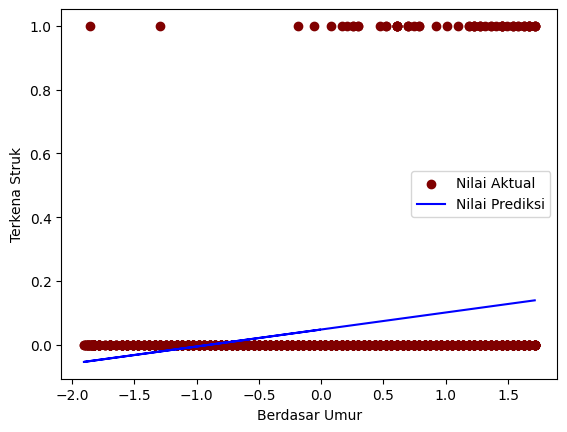

In [98]:
import matplotlib.pyplot as plt

plt.scatter(x_test, y_test, color="maroon", label="Nilai Aktual")
plt.plot(x_test, y_pred, color="blue", label="Nilai Prediksi")
plt.xlabel("Berdasar Umur")
plt.ylabel("Terkena Struk")
plt.legend()
plt.show()

# Regression

In [95]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

In [96]:
mse = mean_squared_error(y_test, y_pred)
rmse =np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)

MSE: 0.045687787576660636
RMSE: 0.21374701770237786
MAE: 0.0993771748054656
R2: 0.05357178712209287
